# Regression Example


In [ ]:
import warnings
warnings.filterwarnings('ignore')

Let’s use Sci Kit Learn (also referred to as SK Learn) to build a model to predict the clinician's Parkinson's disease symptom score on the UPDRS scale. The dataset came from the UCI repository. You can find a more detailed description of the dataset at: 
- https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring
- https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/

Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection 
- https://biomedical-engineering-online.biomedcentral.com/articles/10.1186/1475-925X-6-23 

In [ ]:
!wget -O data.zip https://drive.google.com/u/0/uc?id=1DEMhy3x7ws8Eyv0VGzJNFeYkuXhFDXhC&export=download
!unzip -o data.zip 

--2020-09-10 16:47:29--  https://drive.google.com/u/0/uc?id=1DEMhy3x7ws8Eyv0VGzJNFeYkuXhFDXhC
Resolving drive.google.com (drive.google.com)... 172.253.123.102, 172.253.123.138, 172.253.123.100, ...
Connecting to drive.google.com (drive.google.com)|172.253.123.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fs30eack3du03ncv1is1ig22a99fu7sv/1599756450000/04063593624032689852/*/1DEMhy3x7ws8Eyv0VGzJNFeYkuXhFDXhC [following]
--2020-09-10 16:47:30--  https://doc-00-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fs30eack3du03ncv1is1ig22a99fu7sv/1599756450000/04063593624032689852/*/1DEMhy3x7ws8Eyv0VGzJNFeYkuXhFDXhC
Resolving doc-00-4g-docs.googleusercontent.com (doc-00-4g-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to doc-00-4g-docs.googleusercontent.com (doc-00-4g-docs.googleusercontent.co

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

- Drop the `total_UPDRS` column


In [ ]:
training, validation, test = pd.read_csv("./data/random_split/train.csv"), pd.read_csv("./data/random_split/dev.csv"), pd.read_csv("./data/random_split/test.csv")
training_targets, validation_targets, test_targets = training["total_UPDRS"], validation["total_UPDRS"], test["total_UPDRS"]
training, validation, test = training.drop(columns=["total_UPDRS"]), validation.drop(columns=["total_UPDRS"]), test.drop(columns=["total_UPDRS"])

In [ ]:
training.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'Jitter(%)',
       'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer',
       'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11',
       'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [ ]:
reg = LinearRegression(fit_intercept=True, normalize=False)
reg.fit(training, training_targets)
reg.score(validation, validation_targets)

0.9018594184149056

- let’s remove the `motor_UPDRS` feature column and reevaluate

In [ ]:
training, validation, test = training.drop(columns=["motor_UPDRS"]), validation.drop(columns=["motor_UPDRS"]), test.drop(columns=["motor_UPDRS"])

In [ ]:
reg.fit(training, training_targets)
reg.score(validation, validation_targets)

0.28260524759158767

- With the right attribute weighting a nearest neighbor model could trivially learn to use the `subject#` feature to make predictions that are too good to be true. Anyway, an arbitrarily assigned value such as `subject#` can’t possibly have inherent value as a predictor of any target. So, now let’s go back to our code and remove the `subject#` feature and reevaluate the system. Then return here and continue.

In [ ]:
training, validation, test = training.drop(columns=["subject#"]), validation.drop(columns=["subject#"]), test.drop(columns=["subject#"])

In [ ]:
reg.fit(training, training_targets)
reg.score(validation, validation_targets)

0.1880258172302618

Remove `age`, `sex`, and `test_time`

In [ ]:
drop_me = ["age", "sex", "test_time"]
training, validation, test = training.drop(columns=drop_me), validation.drop(columns=drop_me), test.drop(columns=drop_me)

In [ ]:
reg.fit(training, training_targets)
reg.score(validation, validation_targets)

0.09274893382152838

- Let's replace the call to the `score` method with a call to `predict` to get the output for the tuning data. Then pass those model estimates along with the true labels to `metrics.mean_squared_error`. You will then need to take the square root to get the final RMSE value.

In [ ]:
import math
from sklearn.metrics import mean_squared_error

preds = reg.predict(validation)
math.sqrt(mean_squared_error(validation_targets, preds))

9.977238054628204

- load the full by subject training file (`/data/subject_split/train.csv`) and tuning file (`/data/subject_split/dev.csv`), 
- display and investigate the contents in a table, 
- copy the clinician’s `total_UPDRS` score column to subject_targets vector, 
- drop the `total_UPDRS`, `motor_UPDRS` and `subject#` columns
- initialize a `linear_model.LinearRegression()` model with its default parameters,
- train model_2.1 using the fit method, and
- evaluate model_2.1 using score and or metrics.


In [ ]:
training, validation = pd.read_csv("./data/subject_split/train.csv"), pd.read_csv("./data/subject_split/dev.csv")
training_targets, validation_targets = training["total_UPDRS"], validation["total_UPDRS"]
drop_me = ["total_UPDRS", "motor_UPDRS", "subject#"]
training, validation = training.drop(columns=drop_me), validation.drop(columns=drop_me)
reg = LinearRegression()
reg.fit(training, training_targets)
reg.score(validation, validation_targets)

-0.9868741670216149

In [ ]:
preds = reg.predict(validation)
math.sqrt(mean_squared_error(validation_targets, preds))

14.33989430609542

- Remove `age`, `sex` and `test_time`, and reevaluate the system.

In [ ]:
drop_me = ["age", "sex", "test_time"]
training, validation = training.drop(columns=drop_me), validation.drop(columns=drop_me)
reg.fit(training, training_targets)
reg.score(validation, validation_targets)

-1.0280801358281222

In [ ]:
preds = reg.predict(validation)
math.sqrt(mean_squared_error(validation_targets, preds))

14.487829435301746

- load the subject_split datasets, 

- use the code provided in colab to group examples (rows in the tables) by subject `.groupby(['subject#'], as_index=False)` and convert each group to an aggregate `...agg(groupingFunction)`, where `groupingFunction` is defined in the code to generate a record with the mean and standard deviation of each speech metric,

- display and investigate the contents in a table, 

- copy the clinician’s `total_UPDRS` score column to `subject_ex_targets`, 

- also copy the clinician’s `motor_UPDRS` score column to `motor_targets`,

- drop the `total_UPDRS`, `motor_UPDRS` and `subject#` columns

- initialize a `linear_model.LinearRegression()` model with its default parameters,

train model_3.1 using the fit method evaluate model_3.1 using score and or metrics.

In [ ]:
def initalize_data():
    training, validation = pd.read_csv("./data/subject_split/train.csv"), pd.read_csv("./data/subject_split/dev.csv")
    groupingFunction = {
        'age':['mean','std'],
        'sex':['mean','std'],
        'test_time':['mean','std'],
        'motor_UPDRS':['mean','std'],
        'total_UPDRS':['mean','std'],
        'Jitter(%)':['mean','std'],
        'Jitter(Abs)':['mean','std'],
        'Jitter:RAP':['mean','std'],
        'Jitter:PPQ5':['mean','std'],
        'Jitter:DDP':['mean','std'],
        'Shimmer':['mean','std'],
        'Shimmer(dB)':['mean','std'],
        'Shimmer:APQ3':['mean','std'],
        'Shimmer:APQ5':['mean','std'],
        'Shimmer:APQ11':['mean','std'],
        'Shimmer:DDA':['mean','std'],
        'NHR':['mean','std'],
        'HNR':['mean','std'],
        'RPDE':['mean','std'],
        'DFA':['mean','std'],
        'PPE':['mean','std']
    }
    training = training.groupby(['subject#'], as_index=False).agg(groupingFunction)
    validation = validation.groupby(['subject#'], as_index=False).agg(groupingFunction)
    training_targets, validation_targets = training["total_UPDRS"], validation["total_UPDRS"]
    return training, validation, training_targets, validation_targets

In [ ]:
training, validation, training_targets, validation_targets = initalize_data()
training, validation = training.drop(columns=["total_UPDRS"]), validation.drop(columns=["total_UPDRS"])
reg = LinearRegression()
reg.fit(training, training_targets)
preds = reg.predict(validation)

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(validation_targets, preds))

-4.299569600093843


In [ ]:
print(math.sqrt(mean_squared_error(validation_targets, preds)))

18.94231497575913


## Performance on Single Example per Subject Datasets

---
- Use one example per subject
- Create a mean, maximum, and minimum example for each subject (three examples)

Choose 3-6 examples based on their proximity (via Euclidean distance) from the examples of other subjects. Make sure if you put a (hyper)plane between the two examples they would be on the same side of that hyperplane as their subject’s mean example.
- Add the mean example to the preceding group.
- Choose 3-6 random examples per subject.


In [ ]:
import requests

data = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data').text
%store data > data/parkinsons_updrs.data

Writing 'data' (str) to file 'data/parkinsons_updrs.data'.


In [ ]:
data = pd.read_csv("data/parkinsons_updrs.data")
data = data.drop(columns=["test_time"])
data.head()

,subject#,age,sex,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [ ]:
bar = '=' * 59
names = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.names').text
print(names.split(bar)[4].replace('\n\n\n', ''))



ATTRIBUTE INFORMATION:

subject# - Integer that uniquely identifies each subject
age - Subject age
sex - Subject gender '0' - male, '1' - female
test_time - Time since recruitment into the trial. The integer part is the 
number of days since recruitment.
motor_UPDRS - Clinician's motor UPDRS score, linearly interpolated
total_UPDRS - Clinician's total UPDRS score, linearly interpolated
Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP - Several measures of 
variation in fundamental frequency
Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA - 
Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
RPDE - A nonlinear dynamical complexity measure
DFA - Signal fractal scaling exponent
PPE - A nonlinear measure of fundamental frequency variation 


In [ ]:
subjects = set(data['subject#'].tolist())
print("Number of subjects:", len(subjects))

Number of subjects: 42


In [ ]:
from tqdm import tqdm
from sklearn import svm
import random

single_sample, random_sample, mean_sample, min_max_sample, distance_sample = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

for subject in tqdm(subjects):
    subject_df = data.loc[data['subject#'] == subject]
    single_sample = single_sample.append(subject_df.sample(), ignore_index=True)
    random_sample = random_sample.append(subject_df.sample(random.randint(2, 5)), ignore_index=True)
    random_sample = random_sample.append(subject_df.mean().to_frame().T, ignore_index=True)
    mean_sample = mean_sample.append(subject_df.mean().to_frame().T, ignore_index=True)
    min_max_sample = min_max_sample.append(subject_df.loc[subject_df['total_UPDRS'].idxmin()], ignore_index=True)
    min_max_sample = min_max_sample.append(subject_df.mean().to_frame().T, ignore_index=True)
    min_max_sample = min_max_sample.append(subject_df.loc[subject_df['total_UPDRS'].idxmax()], ignore_index=True)
    
    proximity = []
    svm_df = subject_df.drop(columns=["subject#", "total_UPDRS"])
    svm_df = svm_df.append(data.loc[data['subject#'] != subject].drop(columns=["subject#", "total_UPDRS"]).sample(len(subject_df)), ignore_index=True)
    svm_targets = [1] * len(subject_df) + [0] * len(data.loc[data['subject#'] != subject].sample(len(subject_df)))
    clf = svm.SVC(gamma=10**-1, C=10**-2)
    clf.fit(svm_df, svm_targets) 
    for i1, r1 in subject_df.iterrows():
        sample_distance = pd.DataFrame()
        reduced_df = data.loc[data['subject#'] != subject].drop(columns=["subject#", "sex"])
        distance = []
        for i2, r2 in reduced_df.sample(150).iterrows():
            # Euclidean distance
            distance.append(sum((pd.DataFrame(subject_df.loc[i1]).subtract(pd.DataFrame(reduced_df.loc[i2]))**2)))
            sample_distance = sample_distance.append(reduced_df.loc[i2], ignore_index=True)
        sample_distance['distance'] = distance
        sample_distance = sample_distance.sort_values(by=['distance']).reset_index(drop=True)
        proximity.append(sample_distance.iloc[0]['distance'])
    subject_df['distance'] = proximity
    subject_df = subject_df.sort_values(by=['distance']).reset_index(drop=True)
    subject_df = subject_df.drop(columns=["distance"])
    i, number_of_instances = 0, random.randint(3, 6)
    for index, row in subject_df.iterrows():
        # Hyperplane
        pred = clf.predict([subject_df.loc[index].drop(labels=["subject#", "total_UPDRS"])])
        if pred[0] == 1:
            distance_sample = distance_sample.append(subject_df.loc[index], ignore_index=True)
            i = i + 1
        if i == number_of_instances:
            break

print(f"\n{bar}\na single random sample: {single_sample.index.stop} rows\n\n{str(single_sample.head(5)).split('[')[0]}")
print(f"{bar}\n3-6 random samples (including mean): {random_sample.index.stop} rows\n\n{str(random_sample.head(10)).split('[')[0]}")
print(f"{bar}\nmean sample: {mean_sample.index.stop} rows\n\n{str(mean_sample.head(5)).split('[')[0]}")
print(f"{bar}\nminimum, mean, and maximum samples: {min_max_sample.index.stop} rows\n\n{str(min_max_sample.head(9)).split('[')[0]}")
print(f"{bar}\nproximity (via Euclidean distance) samples: {distance_sample.index.stop} rows\n\n{str(distance_sample.head(15)).split('[')[0]}")

100%|██████████| 42/42 [1:34:30<00:00, 135.02s/it]


a single random sample: 42 rows

   subject#  age  sex  motor_UPDRS  ...     HNR     RPDE      DFA      PPE
0         1   72    0       36.978  ...  25.451  0.44728  0.52472  0.22185
1         2   58    0       11.501  ...  22.593  0.50858  0.68771  0.16946
2         3   57    0       27.639  ...  27.987  0.36804  0.59402  0.14037
3         4   74    0       13.934  ...  21.581  0.59119  0.65012  0.15530
4         5   75    0       32.244  ...  20.917  0.50918  0.67314  0.15916


3-6 random samples (including mean): 188 rows

   subject#   age  sex  motor_UPDRS  ...        HNR      RPDE       DFA       PPE
0       1.0  72.0  0.0    32.710000  ...  22.203000  0.518060  0.569780  0.175080
1       1.0  72.0  0.0    29.435000  ...  25.188000  0.495200  0.552860  0.228830
2       1.0  72.0  0.0    31.898933  ...  25.453027  0.469118  0.558249  0.195757
3       2.0  58.0  0.0    12.915000  ...  18.719000  0.592460  0.767510  0.234560
4       2.0  58.0  0.0    11.501000  ...  20.405000  0.46

In [ ]:
split = 0.8
experiments = [[single_sample, "single random sample"], 
              [random_sample, "3-6 random samples (including mean)"], 
              [mean_sample, "mean sample"], 
              [min_max_sample, "minimum, mean, and maximum samples"], 
              [distance_sample, "proximity (via Euclidean distance) samples"]]
drop_me = ["total_UPDRS", "motor_UPDRS", "subject#"]

for experiment in experiments:
    dataset = experiment[0].sample(frac=1).reset_index(drop=True)
    X_train, X_test = dataset[:int(split * len(dataset))], dataset[int(split * len(dataset)):]
    y_train, y_test = X_train["total_UPDRS"], X_test["total_UPDRS"]
    drop_me = ["total_UPDRS", "motor_UPDRS", "subject#"]
    X_train, X_test = X_train.drop(columns=drop_me), X_test.drop(columns=drop_me)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    print(bar, "\n", experiment[1])
    print("R^2 :", reg.score(X_test, y_test))
    preds = reg.predict(X_test)
    print("RMSE:", math.sqrt(mean_squared_error(y_test, preds)))

 single random sample
R^2 : -0.7969053517623443
RMSE: 14.039081198541444
 3-6 random samples (including mean)
R^2 : -0.42214896075777
RMSE: 12.04073885652
 mean sample
R^2 : -3.2855762332703584
RMSE: 19.483428920476097
 minimum, mean, and maximum samples
R^2 : -0.8079534557577706
RMSE: 11.979622119678845
 proximity (via Euclidean distance) samples
R^2 : -0.030559567781890177
RMSE: 12.214015958533297


- This Linear Regression model only has one meaningful hyperparameter: `normalize = True`; the default value is false. Feel free to modify this value and rerun your best model to see if you get any better performance. We will explore hyperparameter tuning in a future module.

In [ ]:
for experiment in experiments:
    dataset = experiment[0].sample(frac=1).reset_index(drop=True)
    X_train, X_test = dataset[:int(split * len(dataset))], dataset[int(split * len(dataset)):]
    y_train, y_test = X_train["total_UPDRS"], X_test["total_UPDRS"]
    X_train, X_test = X_train.drop(columns=drop_me), X_test.drop(columns=drop_me)
    reg = LinearRegression(normalize = True)
    reg.fit(X_train, y_train)
    print(bar, "\n", experiment[1])
    print("R^2 :", reg.score(X_test, y_test))
    preds = reg.predict(X_test)
    print("RMSE:", math.sqrt(mean_squared_error(y_test, preds)))

 single random sample
R^2 : -0.5956998513319398
RMSE: 11.382147320419493
 3-6 random samples (including mean)
R^2 : -0.0431565972081982
RMSE: 9.773120207061783
 mean sample
R^2 : -2.4289021258728316
RMSE: 15.797922674007078
 minimum, mean, and maximum samples
R^2 : 0.27017042487863996
RMSE: 8.179309942301842
 proximity (via Euclidean distance) samples
R^2 : 0.10530114534966817
RMSE: 8.923387124736072


- Compute the correlation coefficient between each feature vector and the target vector. Let’s iterate over each of our features and compute its Pearson product-moment correlation coefficient with the target: `numpy.corrcoef(x, y)`

In [ ]:
training, validation = pd.read_csv("./data/subject_split/train.csv"), pd.read_csv("./data/subject_split/dev.csv")
training_targets, validation_targets = training["total_UPDRS"], validation["total_UPDRS"]
values = training.corr(method='pearson')["total_UPDRS"].sort_values()
print(values)

sex             -0.130545
DFA             -0.032152
Shimmer:DDA     -0.013881
Shimmer:APQ3    -0.013880
HNR             -0.012675
Jitter(%)       -0.007983
Jitter:RAP      -0.004980
Jitter:DDP      -0.004967
Jitter(Abs)     -0.000677
Jitter:PPQ5      0.005971
NHR              0.005981
Shimmer:APQ5     0.008723
Shimmer          0.010847
Shimmer(dB)      0.015421
RPDE             0.029307
test_time        0.039251
Shimmer:APQ11    0.044478
PPE              0.050585
age              0.276988
subject#         0.406931
motor_UPDRS      0.911619
total_UPDRS      1.000000
Name: total_UPDRS, dtype: float64


- The correlation coefficient can give you a fairly reasonable indication of a feature’s importance to the learning, but usually the classifier you are using can provide better feedback. Let’s iterate over each of our features and build a linear regression model based just on that attribute and the target: `fit(train_x, train_y)`; `model.score(dev_x, dev_y)`.

In [ ]:
reg = LinearRegression(normalize=True)
for feature in training.columns:
    reg.fit(np.array(training[feature]).reshape(-1, 1), np.array(training_targets).reshape(-1, 1))
    print(f"{feature:>20} R^2: {str(reg.score(np.array(validation[feature]).reshape(-1, 1), np.array(validation_targets).reshape(-1, 1)))}")

            subject# R^2: -1.0879548846421496
                 age R^2: -0.7733375800593226
                 sex R^2: -1.0015514679145556
           test_time R^2: -1.1021573925340173
         motor_UPDRS R^2: 0.906307390581817
         total_UPDRS R^2: 1.0
           Jitter(%) R^2: -1.114653357226211
         Jitter(Abs) R^2: -1.1094338572412439
          Jitter:RAP R^2: -1.1114353045068404
         Jitter:PPQ5 R^2: -1.1048205398661302
          Jitter:DDP R^2: -1.111428400117334
             Shimmer R^2: -1.0978846184771518
         Shimmer(dB) R^2: -1.0925294390587053
        Shimmer:APQ3 R^2: -1.1211547689168238
        Shimmer:APQ5 R^2: -1.0997837713172651
       Shimmer:APQ11 R^2: -1.0608486164968132
         Shimmer:DDA R^2: -1.121155382672224
                 NHR R^2: -1.1030760674677573
                 HNR R^2: -1.0807875526992583
                RPDE R^2: -1.0456294003371642
                 DFA R^2: -1.0970944093792916
                 PPE R^2: -1.0452564416130579


- The preceding techniques can provide quick insight into the likely value of a feature, but you should think of its actual value as what it adds to the overall model performance when used in combination with all other features. To do this, we iterate over each feature, drop that single feature from the full dataset, fit a model based on all the remaining features, and evaluate it on the tuning dataset. The magnitude of the decrease in performance (the drop in the R squared value in this case) tells us how much positive impact the feature was having in the overall model. 

In [ ]:
print("Drop feature scores", "\n", bar)
for feature in training.columns:
    training, validation, training_targets, validation_targets = initalize_data()
    training, validation = training.drop(columns=[feature]), validation.drop(columns=[feature])
    reg = LinearRegression(normalize=True)
    reg.fit(training, training_targets)
    print(f"{feature:>20} R^2: {reg.score(validation, validation_targets)}")

Drop feature scores 
            subject# R^2: 0.841102587938795
                 age R^2: 0.8812031798374165
                 sex R^2: 0.956244791083372
           test_time R^2: 0.8460112185456997
         motor_UPDRS R^2: 0.9705605876195835
         total_UPDRS R^2: -5.945159506235075
           Jitter(%) R^2: 0.7869144786281304
         Jitter(Abs) R^2: 0.7790699580249373
          Jitter:RAP R^2: 0.7702634750759201
         Jitter:PPQ5 R^2: 0.7923566129432557
          Jitter:DDP R^2: 0.770096196926863
             Shimmer R^2: 0.7885997668629462
         Shimmer(dB) R^2: 0.7880741117345318
        Shimmer:APQ3 R^2: 0.8105127209599265
        Shimmer:APQ5 R^2: 0.7891086066426969
       Shimmer:APQ11 R^2: 0.7998602131553242
         Shimmer:DDA R^2: 0.8060157947972313
                 NHR R^2: 0.8119323410182261
                 HNR R^2: 0.7992478535522564
                RPDE R^2: 0.8957806858650751
                 DFA R^2: 0.9693083058989423
                 PPE R^2: 0.747185783

- Use matplotlib and generate a scatter plot for each feature.

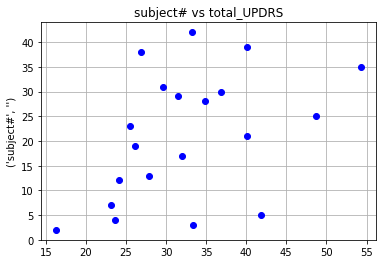

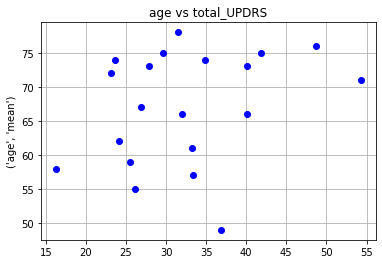

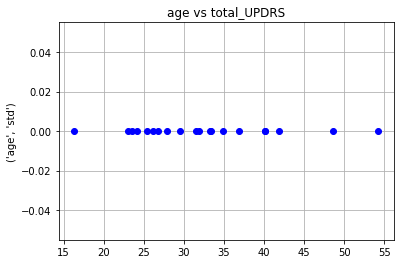

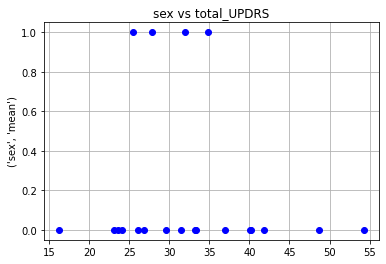

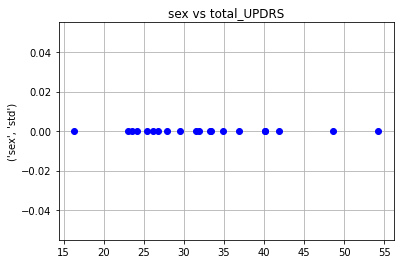

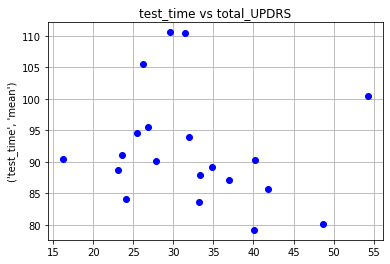

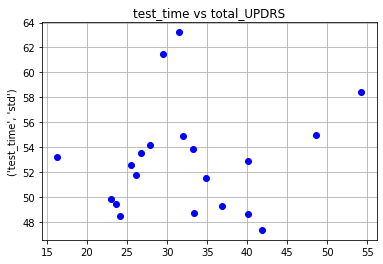

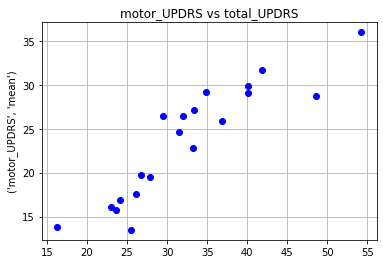

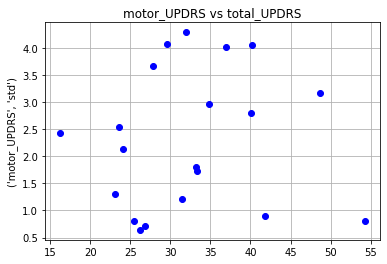

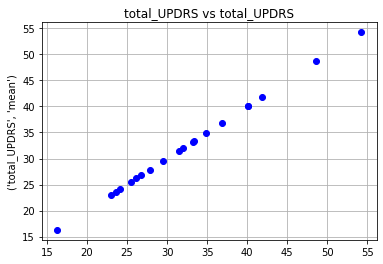

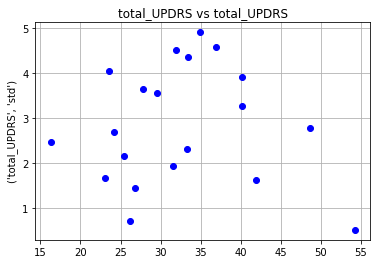

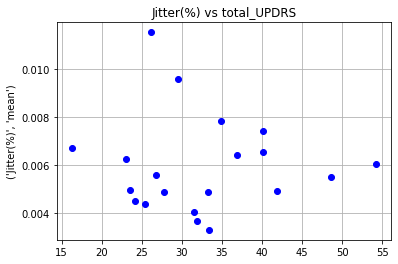

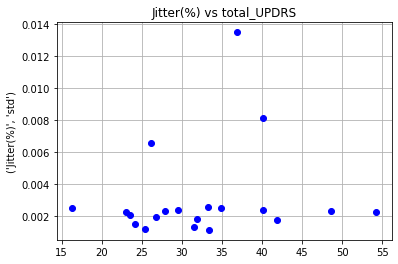

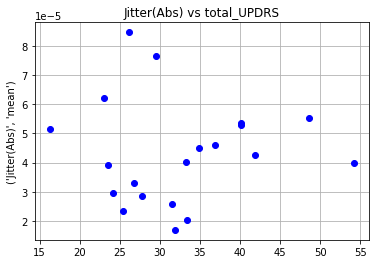

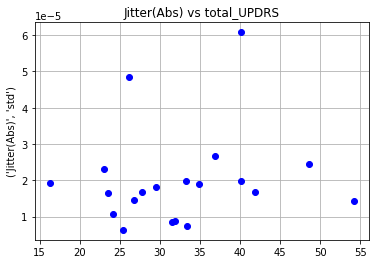

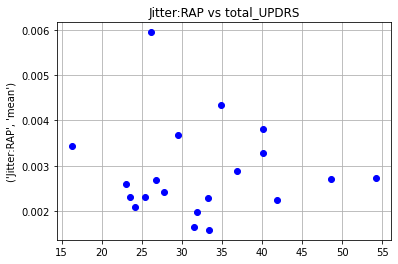

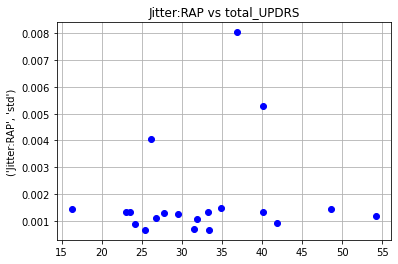

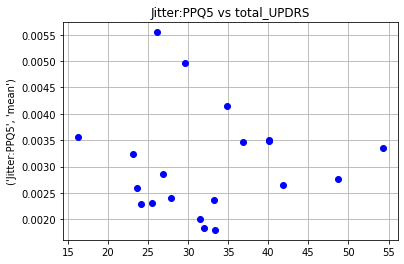

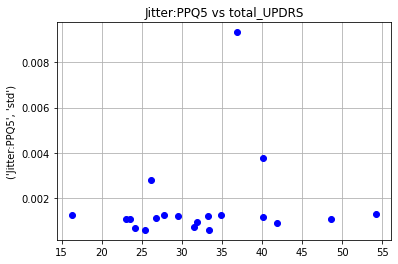

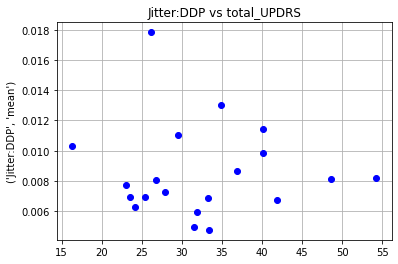

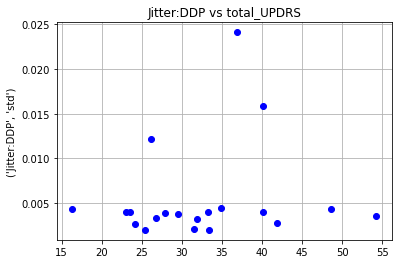

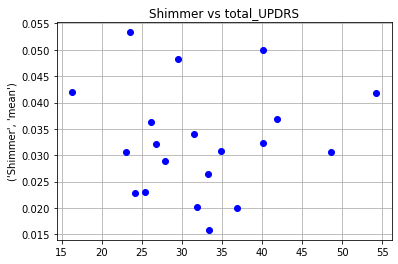

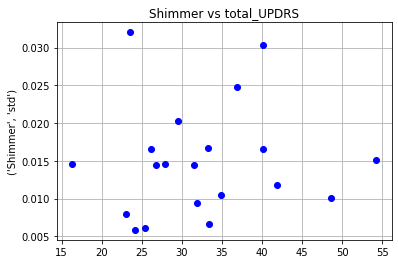

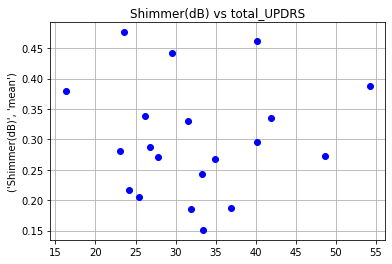

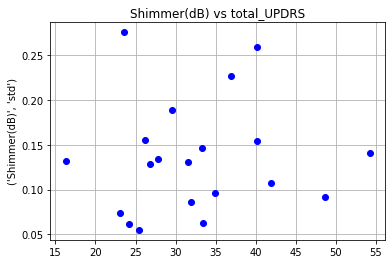

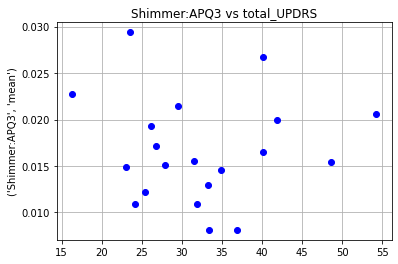

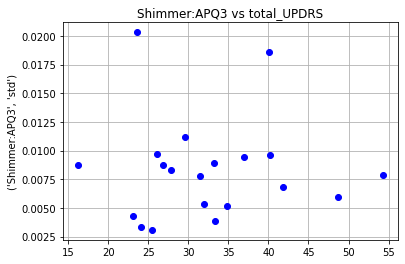

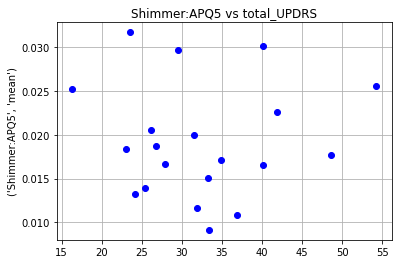

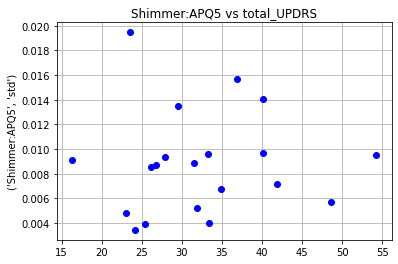

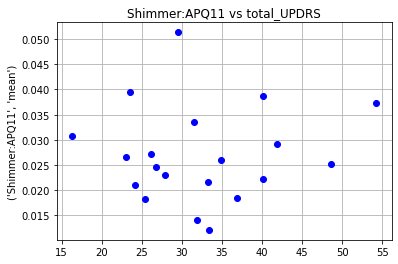

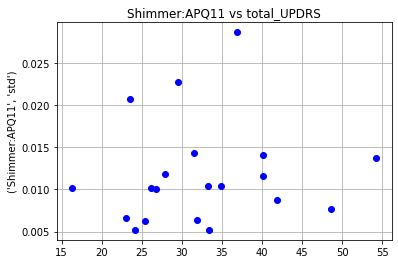

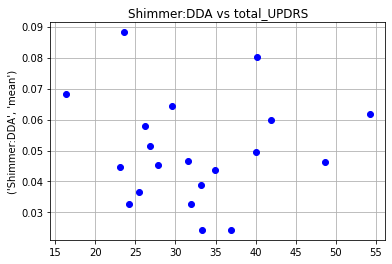

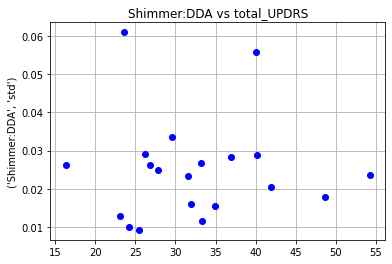

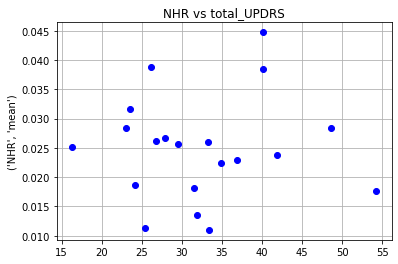

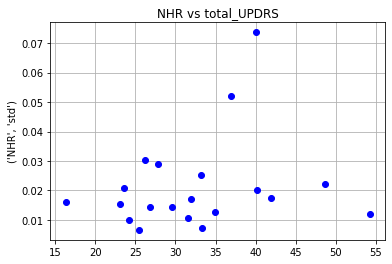

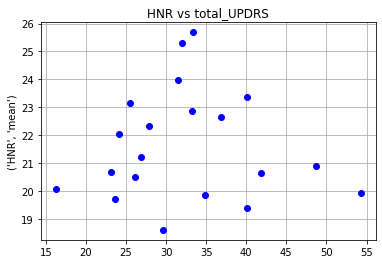

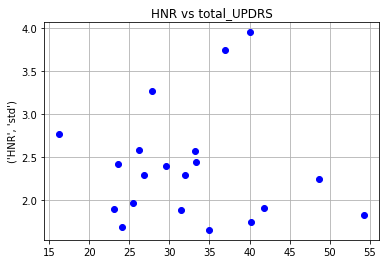

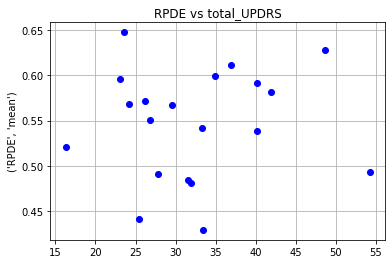

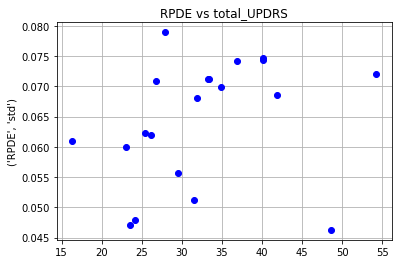

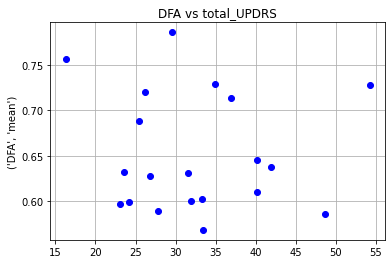

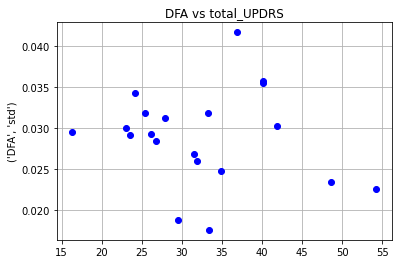

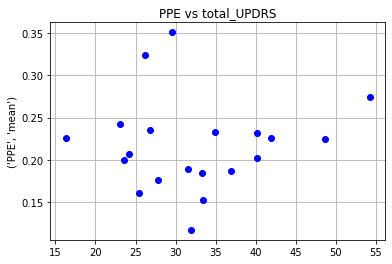

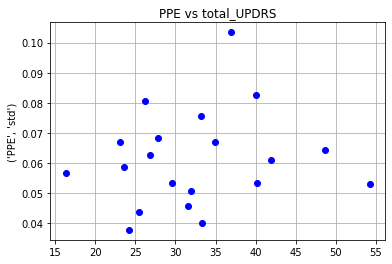

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

training, validation, training_targets, validation_targets = initalize_data()
for feature in training.columns:
    fig, ax = plt.subplots()
    ax.plot(np.array(training_targets['mean']).flatten(), np.array(training[feature]).flatten(), 'bo')
    ax.set(ylabel=feature, title=f"{feature[0]} vs total_UPDRS")
    ax.grid()
    plt.show()

In [ ]:
from IPython.display import display

training, validation = pd.read_csv("./data/subject_split/train.csv"), pd.read_csv("./data/subject_split/dev.csv")
training_targets, validation_targets = training["total_UPDRS"], validation["total_UPDRS"]
training, validation = training.drop(columns=["total_UPDRS"]), validation.drop(columns=["total_UPDRS"])
print(f"subjects in the validation set: {set(validation['subject#'])}")
print(f"number of sujbects: {len(set(validation['subject#']))}")
reg = LinearRegression()
reg.fit(training, training_targets)
preds = reg.predict(validation)
print(f"R^2 score: {reg.score(validation, validation_targets):>27}")
print(f"Intercept: {reg.intercept_:>27}")
print("\nEstimated coefficients for the linear regression problem\n")
coefficients = reg.coef_
for column, coefficient in zip(validation.columns, coefficients):
    print(f"{column:>20}: {coefficient}")
validation['predictions'] = preds
validation['total_UPDRS'] = validation_targets
cols = validation.columns.tolist()
cols.insert(0, cols.pop(cols.index('predictions')))
cols.insert(0, cols.pop(cols.index('total_UPDRS')))
validation = validation.reindex(columns=cols)
display(validation)

subjects in the validation set: {33, 6, 11, 14, 15, 18, 20, 27}
number of sujbects: 8
R^2 score:          0.8501243568121278
Intercept:          20.833559408531357

Estimated coefficients for the linear regression problem

            subject#: 0.10361874460928723
                 age: -0.024698607364300407
                 sex: -0.7368181175860247
           test_time: 0.0029913930827243553
         motor_UPDRS: 1.2338281849697297
           Jitter(%): -1129.2295352644828
         Jitter(Abs): 37388.82821031032
          Jitter:RAP: 15614.403567526399
         Jitter:PPQ5: 584.1203515534553
          Jitter:DDP: -4844.130331205734
             Shimmer: -54.86923786786775
         Shimmer(dB): 2.077494808071511
        Shimmer:APQ3: -10619.451173636508
        Shimmer:APQ5: 149.13482445989393
       Shimmer:APQ11: -76.32158825912234
         Shimmer:DDA: 3530.9923846224165
                 NHR: -19.922794554422747
                 HNR: -0.35091175200036373
                RPDE: 1.87284

,total_UPDRS,predictions,subject#,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,42.2220,36.680308,6,63,0,124.3400,27.482,0.00747,0.000052,0.00440,0.00423,0.01319,0.08700,0.765,0.04757,0.05336,0.06483,0.14272,0.028651,18.697,0.48090,0.70231,0.243810
1,44.5560,38.671942,6,63,0,159.3400,29.037,0.00482,0.000037,0.00233,0.00242,0.00698,0.04564,0.431,0.02336,0.02980,0.03640,0.07009,0.023922,21.714,0.52553,0.64583,0.227670
2,20.6670,20.575934,15,65,0,117.5200,15.000,0.00209,0.000012,0.00066,0.00088,0.00199,0.01176,0.105,0.00529,0.00615,0.00919,0.01586,0.009900,29.605,0.41836,0.53587,0.120140
3,7.9555,9.040302,18,65,0,4.3625,6.000,0.00218,0.000016,0.00091,0.00112,0.00274,0.01545,0.134,0.00802,0.00948,0.01404,0.02406,0.003204,27.909,0.32235,0.62499,0.117190
4,21.9030,20.559455,15,65,0,166.6600,15.000,0.00169,0.000009,0.00068,0.00074,0.00204,0.00941,0.096,0.00409,0.00478,0.00709,0.01228,0.003407,31.096,0.42936,0.55502,0.077124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,41.7550,35.118062,6,63,0,117.3300,27.170,0.00493,0.000033,0.00244,0.00238,0.00733,0.02226,0.216,0.01143,0.01379,0.01985,0.03429,0.024797,23.526,0.39939,0.64157,0.158100
1093,23.0370,26.871033,11,55,0,49.4560,20.028,0.00431,0.000035,0.00213,0.00249,0.00639,0.02189,0.191,0.01062,0.01369,0.02118,0.03186,0.023079,23.929,0.47948,0.67020,0.170330
1094,22.6050,21.301669,15,65,0,194.5500,15.000,0.00280,0.000017,0.00119,0.00127,0.00357,0.01277,0.129,0.00576,0.00627,0.00987,0.01727,0.010317,28.281,0.41086,0.54318,0.092377
1095,30.4540,38.651128,33,66,1,79.4440,25.763,0.00804,0.000030,0.00434,0.00509,0.01302,0.07331,0.638,0.04016,0.04703,0.05537,0.12048,0.050660,15.060,0.49334,0.56824,0.320830


In [ ]:
training, validation = pd.read_csv("./data/subject_split/train.csv"), pd.read_csv("./data/subject_split/dev.csv")
training_targets, validation_targets = training["total_UPDRS"], validation["total_UPDRS"]
UPDRS = training["total_UPDRS"]
training, validation = training.drop(columns=["total_UPDRS"]), validation.drop(columns=["total_UPDRS"])
reg = LinearRegression(normalize=True)
reg.fit(training, training_targets)
preds = reg.predict(validation)
coefficients = reg.coef_
print(f"R^2 score before multiply by coef: {reg.score(validation, validation_targets):>20}")
for column, coefficient in zip(validation.columns, coefficients):
    training[column] = training[column] * coefficient

reg.fit(training, training_targets)
preds = reg.predict(validation)
print(f"R^2 score after multiply by coef: {reg.score(validation, validation_targets):>20}\n")
display(training)

print("\n", bar, "\ncorrelation before\n\n", values, "\n", bar, "\n correlation after\n")
training['total_UPDRS'] = UPDRS
training.corr(method='pearson')["total_UPDRS"].sort_values()

R^2 score before multiply by coef:     0.85012435681211
R^2 score after multiply by coef:  -477.66929890560317



,subject#,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,3.004944,-1.926491,-0.000000,0.129797,31.668668,-3.929719,0.832275,23.733893,1.033893,-22.137676,-2.003276,0.806068,-173.309443,3.206399,-2.765894,172.912697,-0.159482,-8.732439,0.712226,-9.458700,0.018746
1,2.383231,-1.457218,-0.736818,0.070145,15.691827,-6.357562,1.106709,44.813338,1.705631,-41.756403,-1.748134,0.587931,-165.875827,3.051299,-2.203404,165.497613,-0.224630,-7.373709,0.847633,-11.049108,0.014487
2,0.518094,-1.852396,-0.000000,0.252450,38.248674,-3.997473,1.061843,26.232198,1.279224,-24.365976,-1.670768,0.583776,-169.274052,2.790313,-2.023285,168.816746,-0.264654,-7.749886,1.055575,-9.085005,0.018632
3,1.968756,-1.358423,-0.000000,0.310656,22.208907,-6.797962,1.717643,32.477959,1.361000,-30.227373,-1.043613,0.349019,-94.937893,1.552494,-1.225725,94.701216,-0.237978,-7.952713,1.180588,-10.569123,0.026885
4,3.937512,-1.654807,-0.000000,0.421427,24.654355,-4.675010,0.839005,28.574359,1.361000,-26.642717,-1.686132,0.565079,-173.734221,3.042350,-1.821796,173.336416,-0.281728,-7.522144,1.030479,-8.710854,0.027043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0.518094,-1.852396,-0.000000,0.126853,38.248674,-4.189442,1.174757,22.953173,1.209129,-21.314173,-1.732771,0.569234,-177.026251,2.724693,-1.745475,176.549619,-0.271269,-7.321774,0.990568,-9.478344,0.021222
2801,3.937512,-1.654807,-0.000000,0.128319,23.953540,-6.639870,1.253274,47.780075,2.021056,-44.469116,-1.804101,0.652333,-178.831558,2.867863,-1.998099,178.421045,-0.428778,-7.075083,1.069921,-9.482912,0.027184
2802,2.175994,-1.802998,-0.000000,0.370424,36.048758,-4.494334,1.233831,31.072663,1.273382,-28.967899,-1.942920,0.641946,-208.884605,2.979714,-1.927883,208.399171,-0.237858,-7.861827,0.830740,-9.465552,0.016661
2803,0.725331,-1.778300,-0.000000,0.356873,20.254523,-6.052670,1.827192,33.414824,1.705631,-31.147758,-1.828243,0.619093,-178.512974,2.982696,-2.178218,178.067946,-0.713276,-7.531268,1.069134,-8.679637,0.023606



correlation before

 sex             -0.130545
DFA             -0.032152
Shimmer:DDA     -0.013881
Shimmer:APQ3    -0.013880
HNR             -0.012675
Jitter(%)       -0.007983
Jitter:RAP      -0.004980
Jitter:DDP      -0.004967
Jitter(Abs)     -0.000677
Jitter:PPQ5      0.005971
NHR              0.005981
Shimmer:APQ5     0.008723
Shimmer          0.010847
Shimmer(dB)      0.015421
RPDE             0.029307
test_time        0.039251
Shimmer:APQ11    0.044478
PPE              0.050585
age              0.276988
subject#         0.406931
motor_UPDRS      0.911619
total_UPDRS      1.000000
Name: total_UPDRS, dtype: float64 
 correlation after



age             -0.276988
Shimmer:APQ11   -0.044478
Shimmer:DDA     -0.013881
Shimmer         -0.010847
NHR             -0.005981
Jitter:RAP      -0.004980
Jitter(Abs)     -0.000677
Jitter:DDP       0.004967
Jitter:PPQ5      0.005971
Jitter(%)        0.007983
Shimmer:APQ5     0.008723
HNR              0.012675
Shimmer:APQ3     0.013880
Shimmer(dB)      0.015421
RPDE             0.029307
DFA              0.032152
test_time        0.039251
PPE              0.050585
sex              0.130545
subject#         0.406931
motor_UPDRS      0.911619
total_UPDRS      1.000000
Name: total_UPDRS, dtype: float64

- Create the column and set their values to the corresponding subject’s standard deviation.


In [ ]:
training_std, validation_std = pd.read_csv("./data/subject_split/train.csv"), pd.read_csv("./data/subject_split/dev.csv")
groupingFunction = {
    'age':'std','sex':'std','test_time':'std','motor_UPDRS':'std','total_UPDRS':'std','Jitter(%)':'std',
    'Jitter(Abs)':'std','Jitter:RAP':'std','Jitter:PPQ5':'std','Jitter:DDP':'std','Shimmer':'std',
    'Shimmer(dB)':'std','Shimmer:APQ3':'std','Shimmer:APQ5':'std','Shimmer:APQ11':'std','Shimmer:DDA':'std',
    'NHR':'std','HNR':'std','RPDE':'std','DFA':'std','PPE':'std'
}
training_std = training_std.groupby(['subject#'], as_index=False).agg(groupingFunction)
validation_std = validation_std.groupby(['subject#'], as_index=False).agg(groupingFunction)
training_targets_std, validation_targets_std = training_std["total_UPDRS"], validation_std["total_UPDRS"]

training, validation = pd.read_csv("./data/subject_split/train.csv"), pd.read_csv("./data/subject_split/dev.csv")
training_targets, validation_targets = training["total_UPDRS"], validation["total_UPDRS"]

train = pd.DataFrame()
for subject in set(training['subject#']):
    df = training.loc[training['subject#'] == subject]
    std = training_std.loc[training_std['subject#'] == subject]['total_UPDRS']
    df['std'] = [np.array(std)[0] for x in range(len(df))]
    train = train.append(df)
train = train.reset_index(drop=True)
print(train, "\n")
train_targets = train["total_UPDRS"]
train = train.drop(columns=["total_UPDRS"])
training, validation = training.drop(columns=["total_UPDRS"]), validation.drop(columns=["total_UPDRS"])
reg = LinearRegression(normalize=True)
reg.fit(training, training_targets)
print("R^2 :", reg.score(validation, validation_targets))
preds = reg.predict(validation)
print("RMSE:", math.sqrt(mean_squared_error(validation_targets, preds)))

      subject#  age  sex  test_time  ...     RPDE      DFA      PPE       std
0            2   58    0     10.815  ...  0.49252  0.75548  0.23707  2.474089
1            2   58    0     24.808  ...  0.49711  0.73667  0.20408  2.474089
2            2   58    0     80.750  ...  0.51056  0.74622  0.24061  2.474089
3            2   58    0    115.810  ...  0.50006  0.79132  0.26028  2.474089
4            2   58    0    157.800  ...  0.47583  0.76672  0.19086  2.474089
...        ...  ...  ...        ...  ...      ...      ...      ...       ...
2800        31   75    0     88.412  ...  0.54474  0.80915  0.36177  3.567925
2801        31   75    0    188.310  ...  0.51741  0.76749  0.25789  3.567925
2802        31   75    0    202.300  ...  0.53532  0.79933  0.31879  3.567925
2803        31   75    0     55.344  ...  0.49590  0.79271  0.36701  3.567925
2804        31   75    0    202.300  ...  0.58993  0.80521  0.41291  3.567925

[2805 rows x 23 columns] 

R^2 : 0.85012435681211
RMSE: 3.93845

- Then apply your model to each example and compute its error.
- For a given subject, sort their examples by the error. 
 - Analyze the 10-20 examples with the largest positive error, the 10-20 with the largest negative error, and the 10-20 with the smallest absolute error.
- Do the examples in either of the two large error groups have anything in common with each other that is different from the examples in the smallest absolute error group? 

In [ ]:
# train.reset_index()
# for index, row in train.iterrows():
#     X_train, y_train = train.drop(index), train_targets.drop(index)
#     reg.fit(X_train, y_train)
#     # print(train.iloc[index])
#     # print(np.array(train_targets.iloc[index]))
#     # print("R^2 :", reg.score([train.iloc[index]], np.array(train_targets.iloc[index]).reshape(1, -1)))
#     pred = reg.predict([train.iloc[index]])
#     print("RMSE:", math.sqrt(mean_squared_error(np.array(train_targets[index]), pred)))